In [1]:
import pandas as pd

telco = pd.read_csv('Churn.csv')
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [2]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

# Exploratory Data Analysis

### Exploring customer churn

In [3]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

### Summary statistics for both classes

In [4]:
# Group telco by 'Churn' and compute the mean
print(telco.groupby(['Churn']).mean())

       Account_Length  Vmail_Message    Day_Mins    Eve_Mins  Night_Mins  \
Churn                                                                      
no         100.793684       8.604561  175.175754  199.043298  200.133193   
yes        102.664596       5.115942  206.914079  212.410145  205.231677   

       Intl_Mins  CustServ_Calls   Day_Calls  Day_Charge   Eve_Calls  \
Churn                                                                  
no     10.158877        1.449825  100.283158   29.780421  100.038596   
yes    10.700000        2.229814  101.335404   35.175921  100.561077   

       Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
Churn                                                                   
no      16.918909   100.058246      9.006074    4.532982     2.743404   
yes     18.054969   100.399586      9.235528    4.163561     2.889545   

        Area_Code  
Churn              
no     437.074737  
yes    437.817805  


In [5]:
# Adapt your code to compute the standard deviation
print(telco.groupby(['Churn']).std())

       Account_Length  Vmail_Message   Day_Mins   Eve_Mins  Night_Mins  \
Churn                                                                    
no           39.88235      13.913125  50.181655  50.292175   51.105032   
yes          39.46782      11.860138  68.997792  51.728910   47.132825   

       Intl_Mins  CustServ_Calls  Day_Calls  Day_Charge  Eve_Calls  \
Churn                                                                
no      2.784489        1.163883  19.801157    8.530835  19.958414   
yes     2.793190        1.853275  21.582307   11.729710  19.724711   

       Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
Churn                                                                   
no       4.274863    19.506246      2.299768    2.441984     0.751784   
yes      4.396762    19.950659      2.121081    2.551575     0.754152   

       Area_Code  
Churn             
no     42.306156  
yes    42.792270  


### Churn by State

In [6]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

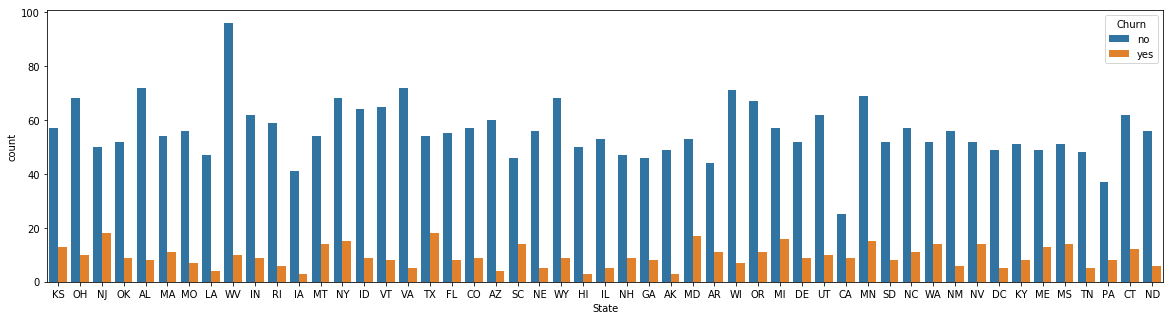

In [7]:
plt.figure(figsize=(20, 5))

# Visualize the bar chart of 'Churn' by 'State'
sns.countplot(x='State', hue='Churn', data=telco)

# Display the plot
plt.show()

### Exploring feature distributions

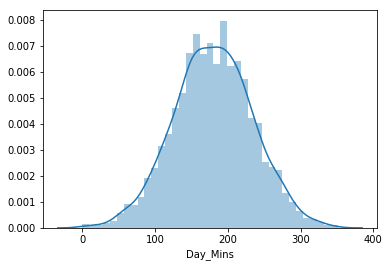

In [8]:
# Visualize the distribution of 'Day_Mins'
sns.distplot(telco['Day_Mins'])

# Display the plot
plt.show()

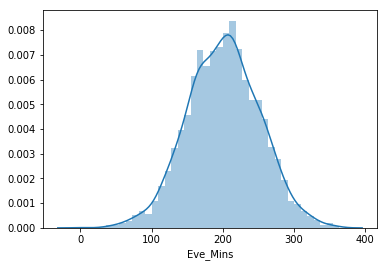

In [9]:
# Visualize the distribution of 'Eve_Mins'
sns.distplot(telco['Eve_Mins'])

# Display the plot
plt.show()

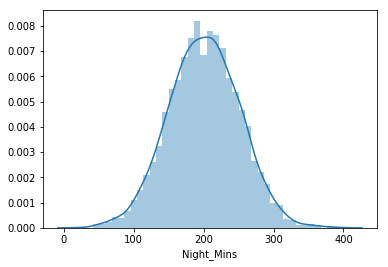

In [10]:
# Visualize the distribution of 'Night_Mins'
sns.distplot(telco['Night_Mins'])

# Display the plot
plt.show()

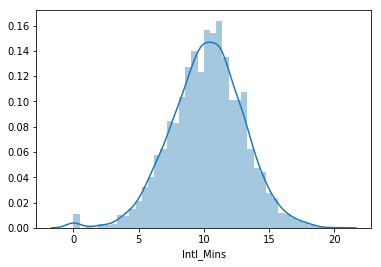

In [11]:
# Visualize the distribution of 'Intl_Mins'
sns.distplot(telco['Intl_Mins'])

# Display the plot
plt.show()

# Preprocessing for Churn Modeling

### Identifying features to convert

In [12]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [13]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace('no', 0)
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace('yes', 1)

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace('no', 0)
telco['Churn'] = telco['Churn'].replace('yes', 1)

# Replace 'no' with 0 and 'yes' with 1 in 'Intl_Plan'
telco['Intl_Plan'] = telco['Intl_Plan'].replace('no', 0)
telco['Intl_Plan'] = telco['Intl_Plan'].replace('yes', 1)

# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())
print(telco['Intl_Plan'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64
0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64


## Feature selection and engineering
### Dropping unnecessary features

In [14]:
# Drop the unnecessary features
telco = telco.drop(['State', 'Area_Code', 'Phone'], axis=1)

In [15]:
# Verify dropped features
print(telco.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge'],
      dtype='object')


# Churn Prediction

### Creating training and test sets

In [16]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Check each sets length

In [17]:
len(X_train)

2333

In [18]:
len(X_test)

1000

### Computing accuracy

In [19]:
# Import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
lr = LogisticRegression()

# Fit to the training data
lr.fit(X_train, y_train)

# Compute accuracy
print(lr.score(X_test, y_test))

0.847


C:\Users\prase\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
# Import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
dtc = DecisionTreeClassifier()

# Fit to the training data
dtc.fit(X_train, y_train)

# Compute accuracy
print(dtc.score(X_test, y_test))

0.908


In [21]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
rfc = RandomForestClassifier()

# Fit to the training data
rfc.fit(X_train, y_train)

# Compute accuracy
print(rfc.score(X_test, y_test))

0.954


## Model Metrics
### Confusion matrix

In [22]:
y_pred = rfc.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[842   8]
 [ 38 112]]


In [23]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(y_test, y_pred))

0.9333333333333333


### Varying training set size

In [24]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[567   4]
 [ 19  77]]


In [26]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(y_test, y_pred))

0.9506172839506173


In [27]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))

0.813953488372093


## Other model metrics
### ROC curve

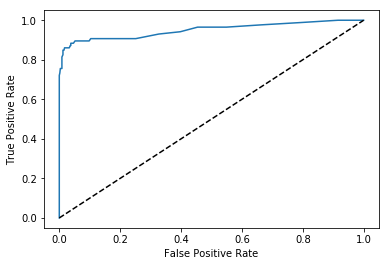

In [28]:
import matplotlib.pyplot as plt

# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

### Area under the curve (AUC)

In [29]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.9499459632550133


### F1 score

In [30]:
# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))

0.8695652173913044


## Making Predictions
### Predicting whether a new customer will churn

In [31]:
import numpy as np
new_customer = pd.DataFrame(np.array([[91,23,232.4,186,190.5,12.3,3,0,1,97,39.51,88,15.81,128,8.57,3,3.32]]),
                           columns=['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins',
                                    'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls',
                                    'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge'])

In [32]:
# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


## Feature importances
### Visualizing feature importances

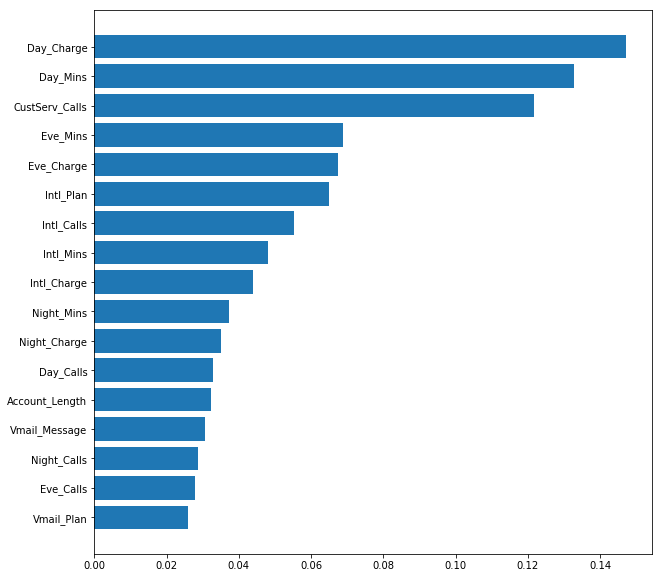

In [33]:
# Calculate feature importances
importances = clf.feature_importances_

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.figure(figsize=(10, 10))
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()